In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle 
import math
import os.path
from os import path
from tqdm import tqdm

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
def parse_data(data_file_name, data_path, data_file_delimiter, save_path):
    with open(data_path, 'r') as temp_file:
        # read the lines
        lines = temp_file.readlines()
        # skip the first line
        lines = lines[1:]

        all_columns = ['Time', 'Type', 'Gesture', 'Foot', 'Direction', 'Checkpoint', 'TrackerName', 'pos_x', 'pos_y', 'pos_z', 'ang_x', 'ang_y', 'ang_z']
        all_data = pd.DataFrame(columns=all_columns, index=range(len(lines)))

        for index, line in tqdm(enumerate(lines)):
            # line to list, delete the '\n' at the end of the line
            list_line = line[:-1].split(data_file_delimiter)
            list_line = [item.strip() for item in list_line]

            column_count = len(list_line)
            if column_count == 9:
                # tracker data
                # only have columns ['Time', 'Type', 'TrackerName', 'pos_x', 'pos_y', 'pos_z', 'ang_x', 'ang_y', 'ang_z'], other columns are None
                all_data.loc[index, all_columns[:2]] = list_line[:2]
                all_data.loc[index, all_columns[6:]] = list_line[2:]
            elif column_count == 6 or column_count == 5:
                # gesture event
                # if count == 6, only have columns ['Time', 'Type', 'Gesture', 'Foot', 'Direction', 'Checkpoint'], other columns are None
                # if count == 5, only have columns ['Time', 'Type', 'Gesture', 'Foot', 'Direction'], other columns are None
                all_data.loc[index, all_columns[:column_count]] = list_line
            elif column_count > 9:
                # the two data accendentally merged together to single line
                error_col = str(list_line[8])
                first_data = list_line[:8] + [error_col[:-13]]
                second_data = [error_col[-13:]] + list_line[9:]
                all_data.loc[index, all_columns[:3]] = first_data[:3]
                all_data.loc[index, all_columns[7:]] = first_data[3:]
                all_data.loc[index+1, all_columns[:3]] = second_data[:3]
                all_data.loc[index+1, all_columns[7:]] = second_data[3:]
            else:
                print('Error: ', column_count, line, line.split(data_file_delimiter))
                raise ValueError('Invalid data format')
        
    save_path_folder = os.path.dirname(save_path)
    if path.exists(save_path_folder) == False:
        os.makedirs(save_path_folder)
        all_data.to_csv(save_path, index=False)
    else:
        all_data.to_csv(save_path, index=False, mode='a')
    

In [3]:
def plot_gesture_pos_data(gesture_data, gesture_name, foot, direction, save_path, save_fig=False):
    fig, axs = plt.subplots(3, 1, figsize=(20, 10))
    fig.suptitle('Gesture: {}, Foot: {}, Direction: {}'.format(gesture_name, foot, direction))
    fig.text(0.5, 1, 'Position of Foot Tracker across time', ha='center')


    checkpoints = gesture_data[gesture_data['Type'] == 'E']['Checkpoint'].unique()
    # annotate the checkpoints
    for checkpoint in checkpoints:
        checkpoint_data = gesture_data[gesture_data['Checkpoint'] == checkpoint]
        axs[0].axvline(checkpoint_data['Time'].iloc[0], color='r', linestyle='--')
        axs[1].axvline(checkpoint_data['Time'].iloc[0], color='r', linestyle='--')
        axs[2].axvline(checkpoint_data['Time'].iloc[0], color='r', linestyle='--')

        axs[0].annotate(checkpoint, (checkpoint_data['Time'].iloc[0], 0.5), (checkpoint_data['Time'].iloc[0], 4.3), color='r')

    # for tracker_name in gesture_data['TrackerName'].unique():
    for tracker_name in ['FootL', 'FootR']:
        tracker_data = gesture_data[gesture_data['TrackerName'] == tracker_name]
        axs[0].plot(tracker_data['Time'], tracker_data['pos_z'], label=tracker_name)
        axs[1].plot(tracker_data['Time'], tracker_data['pos_y'], label=tracker_name)
        axs[2].plot(tracker_data['Time'], tracker_data['pos_x'], label=tracker_name)


    axs[0].set_title('pos_z')
    axs[1].set_title('pos_y')
    axs[2].set_title('pos_x')

    axs[0].legend()

    axs[0].grid(True)
    axs[1].grid(True)
    axs[2].grid(True)

    if save_fig == True:
        save_path_folder = os.path.dirname(save_path)
        if path.exists(save_path_folder) == False:
            os.makedirs(save_path_folder)
        
        fig.savefig(save_path, dpi=300)
    
    plt.show()

In [4]:
def plot_gesture_pos_data(gesture_data, gesture_name, foot, direction, save_path, save_fig=False):
    fig, axs = plt.subplots(3, 1, figsize=(20, 10))
    fig.suptitle('Gesture: {}, Foot: {}, Direction: {}'.format(gesture_name, foot, direction))
    fig.text(0.5, 1, 'Position of Foot Tracker across time', ha='center')


    checkpoints = gesture_data[gesture_data['Type'] == 'E']['Checkpoint'].unique()
    # annotate the checkpoints
    '''
    for checkpoint in checkpoints:
        checkpoint_data = gesture_data[gesture_data['Checkpoint'] == checkpoint]
        axs[0].axvline(checkpoint_data['Time'].iloc[0], color='r', linestyle='--')
        axs[1].axvline(checkpoint_data['Time'].iloc[0], color='r', linestyle='--')
        axs[2].axvline(checkpoint_data['Time'].iloc[0], color='r', linestyle='--')

        axs[0].annotate(checkpoint, (checkpoint_data['Time'].iloc[0], 0.5), (checkpoint_data['Time'].iloc[0], 4.3), color='r')
    '''

    # for tracker_name in gesture_data['TrackerName'].unique():
    for tracker_name in ['FootL', 'FootR']:
        tracker_data = gesture_data[gesture_data['TrackerName'] == tracker_name]
        axs[0].plot(tracker_data['Time'], tracker_data['pos_z'], label=tracker_name)
        axs[1].plot(tracker_data['Time'], tracker_data['pos_y'], label=tracker_name)
        axs[2].plot(tracker_data['Time'], tracker_data['pos_x'], label=tracker_name)


    axs[0].set_title('pos_z')
    axs[1].set_title('pos_y')
    axs[2].set_title('pos_x')

    axs[0].legend()

    axs[0].grid(True)
    axs[1].grid(True)
    axs[2].grid(True)

    if save_fig == True:
        save_path_folder = os.path.dirname(save_path)
        if path.exists(save_path_folder) == False:
            os.makedirs(save_path_folder)
        
        fig.savefig(save_path, dpi=300)
    
    plt.show()

In [4]:
gesture_list = [
        "NormalWalking",
        "TapOuward",
        "TapInFrontOfTheOtherFoot",
        "TapInward",
        "BigStep", 
        "SmallStep",
        "ToeTapBehind",
        "ToeTapInFront",
        "TapWithHeel",
        "TapWithFootRotatedOutwards",
        "TapWithFootRotatedInwards",
        "Click",
        "KickInward",
        "KickOutward",
        "KickForward",
        "LiftInFront",
        "BendingBehind",
        "MidairRotationInwards",
        "MidairRotationOutwards",
        "DraggingInFront",
        "DraggingBehind",
        "Delay",
        "Rush"
    ]

## Parsing tracker data and building data parsing utility

In [5]:
# 1. parse data 
# TODO: there should be a script automatically gather file names by users here
data_file_list = ['User26/P26_2023-02-09-13-15-52', 'User26/P26_2023-02-09-13-33-19', 'User26/P26_2023-02-09-13-56-21']
#data_file_list = ['User20/P20_2023-02-07-17-51-35']
for data_file in data_file_list:
    # /content/drive/MyDrive/Do it in Stride/User Study/Formative Study/StudyRawData/User26/P26_2023-02-09-13-56-21.txt
    raw_data_path = os.path.join('/content/drive/MyDrive/Do it in Stride/User Study/Formative Study/StudyRawData/', data_file + '.txt')
    save_data_path = os.path.join('/content/drive/MyDrive/Do it in Stride/User Study/Formative Study/Data Parsing/parsed_data/aggregated_csv/', data_file[0:6] + '.csv')
    data_file_delimiter = ','
    parse_data(data_file, raw_data_path, data_file_delimiter, save_data_path)

58567it [01:32, 635.62it/s]


KeyboardInterrupt: ignored

In [ ]:
# 2. create index files recording where the start and end of each condition is
user_id = 26
user_data = pd.read_csv(os.path.join('/content/drive/MyDrive/Do it in Stride/User Study/Formative Study/Data Parsing/parsed_data/aggregated_csv/User' + str(user_id) + '.csv'))
index_data = dict()
count = 0
for index, row in user_data.iterrows():
  if row['Type'] == "E":
    if(type(row['Checkpoint']) == float):
      index_data[row['Gesture'] + row['Foot'] + row['Direction']] = index
    else:
      index_data[row['Gesture'] + row['Foot'] + row['Direction'] + row['Checkpoint']] = index
      if row["Time"] == "1675970082906":
        print(index, row['Gesture'], row['Foot'], row['Direction'], row['Checkpoint'])
      if row["Gesture"] == "Rush" and row['Foot'] == "leftfoot" and row["Direction"] == "RecordingForth":
        print(row['Gesture'], row['Foot'], row['Direction'], row['Checkpoint'], row['Time'], index)
print(index_data)

index_pd = pd.DataFrame.from_dict(data=index_data, orient='index')
print(index_pd)
index_pd.to_csv('/content/drive/MyDrive/Do it in Stride/User Study/Formative Study/Data Parsing/parsed_data/index_data/User' + str(user_id) + 'Index.csv', index_label = ["Condition", "Index"])
index_data["RushleftfootRecordingForthEndPoint"]

In [ ]:
import csv
# a function return tracker data by index 
def get_gesture_data(data, index_data, gesture_name, foot, direction):
    start_parse_index = query_condition_index(index_data, gesture_name, foot, direction, "StartPoint")
    end_parse_index = query_condition_index(index_data, gesture_name, foot, direction, "EndPoint")
    if(start_parse_index == -1 or end_parse_index == -1):
      return data[0:0]
    else:
      return data[start_parse_index:end_parse_index+1]
# a function read in index meta data

def read_index_data(user_id):
  from csv import DictReader
  # open file in read mode
  with open('/content/drive/MyDrive/Do it in Stride/User Study/Formative Study/Data Parsing/parsed_data/index_data/User' + str(user_id) + 'Index.csv', 'r') as f:
    next(f)  # Skip the header
    reader = csv.reader(f, skipinitialspace=True)
    result = dict(reader)
  return result
# a function read in main data

In [ ]:
# a function query checkpoint index by condition name
def query_condition_index(index_data, gesture_name, foot, direction, checkpoint):
  #print(index_data)
  if(index_data.get(gesture_name + foot + direction + checkpoint) != None):
    #print(gesture_name + foot + direction + checkpoint, int(index_data[gesture_name + foot + direction + checkpoint]))

    return int(index_data[gesture_name + foot + direction + checkpoint])
  else:
    return -1

# a function query checkpoint index by condition name

# a function checking whether there are missing data


## Plot tracker data

In [ ]:
# read data from csv file
foots = ['rightfoot', 'leftfoot', 'bothFoot']
directions = ['RecordingForth', 'RecordingBack']
user_id = 26
all_data = pd.read_csv('/content/drive/MyDrive/Do it in Stride/User Study/Formative Study/Data Parsing/parsed_data/aggregated_csv/User' + str(user_id) + '.csv')
all_gesture_name = all_data['Gesture'].unique()
index_data = read_index_data(user_id)
len(index_data.keys())

In [ ]:
for gesture_name in all_gesture_name:
    if type(gesture_name) == str:
        if gesture_name == 'NaN':
            continue
        else:
            for foot in foots:
                for direction in directions:
                    # get gesture data
                    gesture_data = get_gesture_data(all_data, index_data, gesture_name, foot=foot, direction=direction)
                    print(gesture_name, gesture_data.shape)

                    # plot data
                    #save_fig_path = figs_dir_path + '/' + gesture_name + '_' + foot + '_' + direction + '.png'
                    plot_gesture_pos_data(gesture_data, gesture_name, foot, direction, "", save_fig=False)

## Get Duration Data

In [ ]:
foots = ['rightfoot', 'leftfoot', 'bothFoot']
directions = ['RecordingForth', 'RecordingBack']
duration_t1 = dict()
duration_t2 = dict()
duration_all = dict()
for i in gesture_list:
  duration_t1[i] = []
  duration_t2[i] = []
  duration_all[i] = []

In [ ]:
# read data from csv file
user_id = 1
all_data = pd.read_csv('/content/drive/MyDrive/Do it in Stride/User Study/Formative Study/Data Parsing/parsed_data/aggregated_csv/User' + str(user_id) + '.csv')
all_gesture_name = all_data['Gesture'].unique()
index_data = read_index_data(user_id)
all_gesture_name

In [ ]:
print(index_data)

In [ ]:
all_data.iloc[int(index_data["RushleftfootRecordingForthEndPoint"])]["Time"]

In [ ]:
for gesture_name in all_gesture_name:
    if type(gesture_name) != float and gesture_name != "Gesture":
        t1, t2, all, count = 0, 0, 0, 0
        for foot in foots[:2]:
            for direction in directions[:2]:
                #print(gesture_name, foot, direction)
                s = query_condition_index(index_data, gesture_name, foot, direction, "StartPoint")
                m1 = query_condition_index(index_data, gesture_name, foot, direction, "MiddlePoint1")
                m2 = query_condition_index(index_data, gesture_name, foot, direction, "MiddlePoint2")
                e = query_condition_index(index_data, gesture_name, foot, direction, "EndPoint")
                if -1 in [s, m1, m2, e]:
                  continue
                #print(foot + direction, s, m1, m2, e)
                if(direction == "RecordingForth"):
                  t1 += int(all_data.iloc[m2]["Time"]) - int(all_data.iloc[m1]["Time"])
                  t2 += int(all_data.iloc[e]["Time"]) - int(all_data.iloc[m2]["Time"])
                  all += int(all_data.iloc[e]["Time"]) - int(all_data.iloc[s]["Time"])
                  count = 1
                else:
                  
                  t1 += int(all_data.iloc[m1]["Time"]) - int(all_data.iloc[m2]["Time"])
                  t2 += int(all_data.iloc[s]["Time"]) - int(all_data.iloc[m1]["Time"])
                  all += int(all_data.iloc[s]["Time"]) - int(all_data.iloc[e]["Time"])
                  count += 1
                #print(t1, t2, all)
                #if(gesture_name == "Rush"):
                #    print(1, gesture_name, foot, direction, t1, t2, all, int(all_data.iloc[s]["Time"]), int(all_data.iloc[m1]["Time"]), int(all_data.iloc[m2]["Time"]), int(all_data.iloc[e]["Time"]))
        duration_t1[gesture_name].append(t1 / count / 1000)
        duration_t2[gesture_name].append(t2 / count / 1000)
        duration_all[gesture_name].append(all / count / 1000)
print(duration_t1, duration_t2, duration_all)

                              
                
                #    print(checkpoint_data['Checkpoint'].iloc[0], checkpoint_data['Time'].iloc[0])


## Parsing Subjective Evaluation
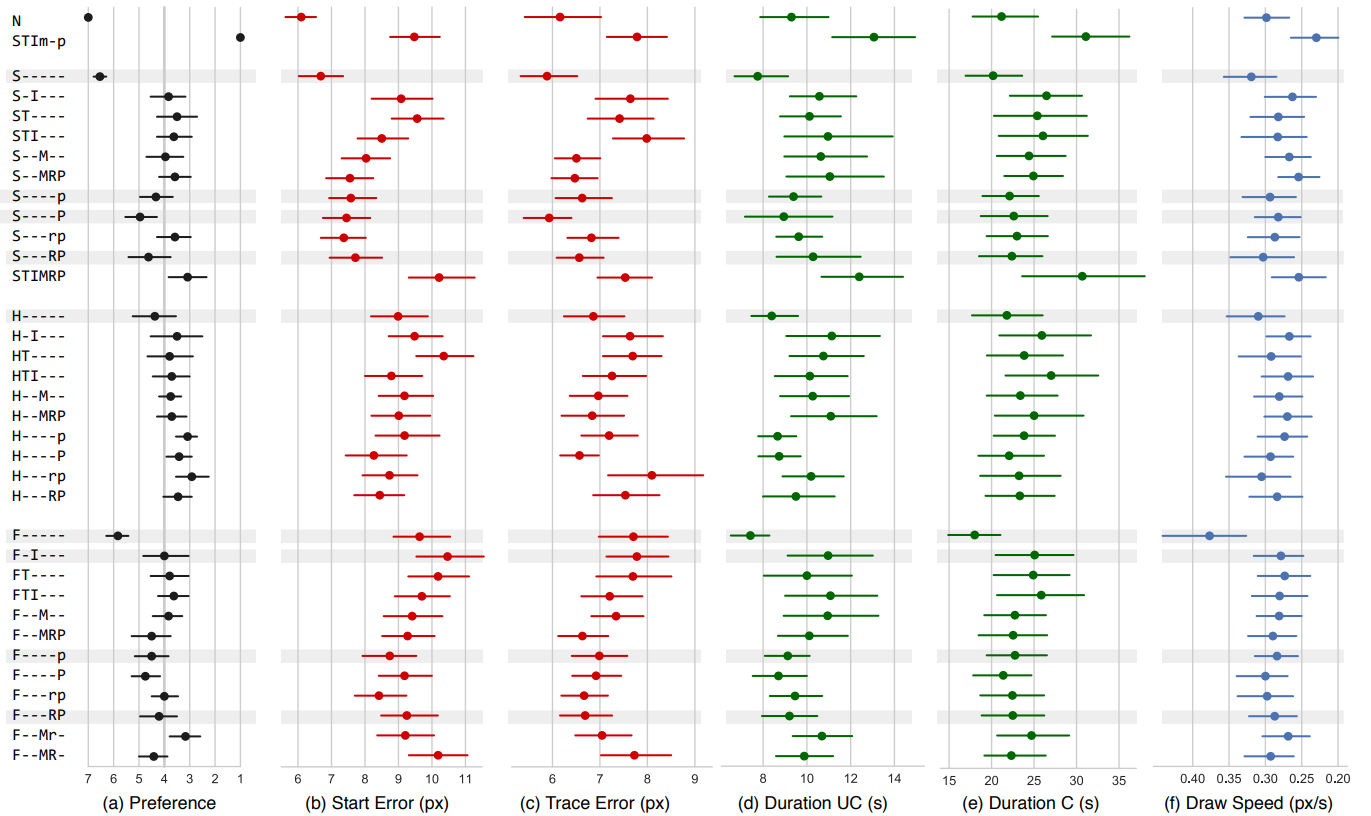

In [6]:
from google.colab import auth
import gspread
from google.auth import default
#autenticating to google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

questionnaire_file_name = 'Post-Questionnaire (Responses)'
# /content/drive/MyDrive/Do it in Stride/User Study/Formative Study/StudyRawData/User26/P26_2023-02-09-13-56-21.txt
#raw_data_path = os.path.join('/content/drive/MyDrive/Do it in Stride/User Study/Formative Study/', data_file_name)
#defining my worksheet
worksheet = gc.open(questionnaire_file_name).sheet1
#get_all_values gives a list of rows
rows = worksheet.get_all_values()
#Convert to a DataFrame 
df = pd.DataFrame(rows)

In [7]:
difficulty_by_gesture = dict()
disruption_by_gesture = dict()
social_by_gesture = dict()
for i in gesture_list:
  difficulty_by_gesture[i] = []
  disruption_by_gesture[i] = []
  social_by_gesture[i] = []

In [8]:
from collections import OrderedDict
for i in range(1, len(df[0])):
  if df[2][i] in gesture_list:
    difficulty_by_gesture[df[2][i]].append(int(df[3][i]))
    disruption_by_gesture[df[2][i]].append(int(df[4][i]))
    social_by_gesture[df[2][i]].append(int(df[5][i]))
difficulty_by_gesture = OrderedDict(reversed(list(difficulty_by_gesture.items())))
disruption_by_gesture = OrderedDict(reversed(list(disruption_by_gesture.items())))
social_by_gesture = OrderedDict(reversed(list(social_by_gesture.items())))

(b) Social Acceptability
(c) Walking Compatibility


NameError: ignored

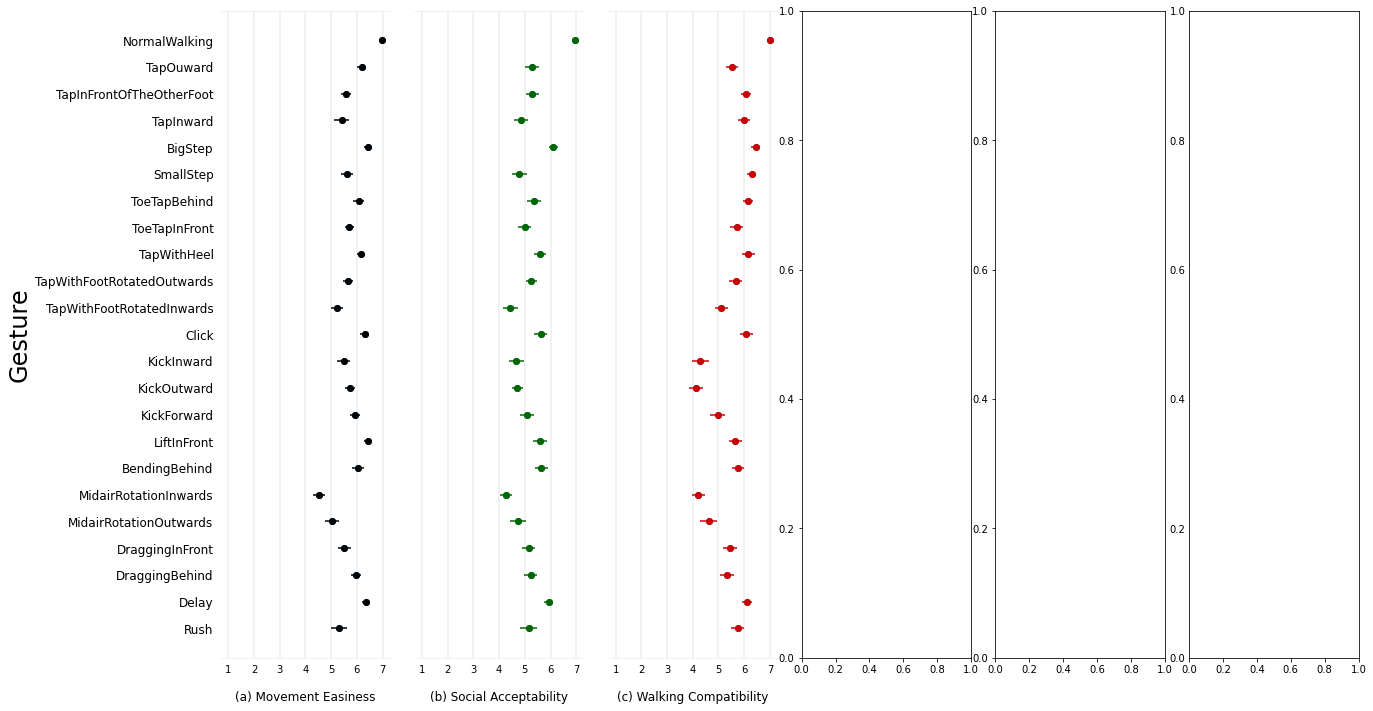

In [10]:
import matplotlib.pyplot as plt

def subplot_subjective_score(names, scores, error, datacolor, subtitle, pole_min, pole_max, xrange, ax, isleftmost):
    hfont = {'fontname':'Helvetica'}
    for i in xrange:
      ax.axvline(x=i, color='#EEEEEE', zorder=0)
    
    # setting xticks to be by integer 
    ax.set_xticks(xrange)

    #ax.set_xticklabels(names)

    #ax.set_xlim([0.5, 7.5])
  
    # setting margin between yticks

    #ax.yaxis.set_tick_params(labelsize=20)
    if isleftmost:
      ax.set_yticks(range(len(names)))
      ax.set_yticklabels(names, size = 12)
      ax.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=True, labelbottom=True)
    else: 
      print(subtitle)
      ax.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=True)
    # plt.ylabel("X-axis", labelpad=0)
    # Control the scale and distance of the y-ticks
    plt.gca().yaxis.set_tick_params(length=0, width=0, direction='out')
    #plt.gca().xaxis.set_tick_params(length=0, width=0, direction='out')

    ax.errorbar(scores, range(len(names)), xerr=error, fmt='o', color=datacolor)
    ax.scatter(scores, range(len(names)))
    # remove left and right border of plot
    ax.spines['right'].set_visible(False)

    ax.spines['left'].set_visible(False)

    # set top and bottom border color of plot to grey
    ax.spines['top'].set_color('#EEEEEE')
    ax.spines['bottom'].set_color('#EEEEEE')
    #ax.text(7, 23.5, pole_max, size = 8, ha = 'center')
    #ax.text(1, 23.5, pole_min, size = 8, ha = 'center')
    ax.set_xlabel(subtitle, labelpad=16, size = 12, **hfont)
    if isleftmost:
      ax.set_ylabel("Gesture", size = 24)
    # ax.set_title("Error Rate vs. Score")
    # plt.colorbar()
    plt.rcParams['figure.figsize'] = [16, 9]

fig, ax = plt.subplots(1, 6)
fig.tight_layout(pad = -1)
subplot_subjective_score(names = difficulty_by_gesture.keys(), 
                      scores = [sum(difficulty_by_gesture[i]) / len(difficulty_by_gesture[i]) for i in difficulty_by_gesture], 
                      error = [np.std(difficulty_by_gesture[i]) / np.sqrt(len(difficulty_by_gesture[i])) for i in difficulty_by_gesture],
                      datacolor = "black", subtitle = "(a) Movement Easiness", pole_min = "very difficult", pole_max = "very easy", xrange = range(1, 8), ax = ax[0], isleftmost = True)
subplot_subjective_score(names = social_by_gesture.keys(), 
                      scores = [sum(social_by_gesture[i]) / len(social_by_gesture[i]) for i in social_by_gesture], 
                      error = [np.std(social_by_gesture[i]) / np.sqrt(len(social_by_gesture[i])) for i in social_by_gesture],
                      datacolor = "#006600", subtitle = "(b) Social Acceptability", pole_min = "very\nuncomfortable", pole_max = "very\ncomfortable", xrange = range(1, 8), ax = ax[1], isleftmost = False)
subplot_subjective_score(names = disruption_by_gesture.keys(), 
                      scores = [sum(disruption_by_gesture[i]) / len(disruption_by_gesture[i]) for i in disruption_by_gesture], 
                      error = [np.std(disruption_by_gesture[i]) / np.sqrt(len(disruption_by_gesture[i])) for i in disruption_by_gesture],
                      datacolor = "#cc0000", subtitle = "(c) Walking Compatibility", pole_min = "very much", pole_max = "very little", xrange = range(1, 8), ax = ax[2], isleftmost = False)
subplot_subjective_score(names = duration_all.keys(), 
                      scores = [sum(duration_all[i]) / len(duration_all[i]) for i in duration_all], 
                      error = [np.std(duration_all[i]) / np.sqrt(len(duration_all[i])) for i in duration_all],
                      datacolor = "#4c72b0", subtitle = "(d) Overall Duration (s)", pole_min = "", pole_max = "", xrange = range(6, 17, 2), ax = ax[3], isleftmost = False)
subplot_subjective_score(names = duration_t1.keys(), 
                      scores = [sum(duration_t1[i]) / len(duration_t1[i]) for i in duration_t1], 
                      error = [np.std(duration_t1[i]) / np.sqrt(len(duration_t1[i])) for i in duration_t1],
                      datacolor = "#4c72b0", subtitle = "(e) Trial 1 Duration (s)", pole_min = "", pole_max = "", xrange = range(2, 8), ax = ax[4], isleftmost = False)
subplot_subjective_score(names = duration_t2.keys(), 
                      scores = [sum(duration_t2[i]) / len(duration_t2[i]) for i in duration_t2], 
                      error = [np.std(duration_t2[i]) / np.sqrt(len(duration_t2[i])) for i in duration_t2],
                      datacolor = "#4c72b0", subtitle = "(f) Trial 2 Duration (s)", pole_min = "", pole_max = "", xrange = range(2, 8), ax = ax[5], isleftmost = False)

#plt.figure(facecolor='white')
#plt.show()
plt.savefig("Subjective Score.png", bbox_inches="tight")



In [ ]:

import matplotlib.pyplot as plt

def subplot_subjective_score(names, scores, error, datacolor, subtitle, pole_min, pole_max, xrange, ax, isleftmost):
    hfont = {'fontname':'Helvetica'}
    for i in xrange:
      ax.axvline(x=i, color='#EEEEEE', zorder=0)
    
    # setting xticks to be by integer 
    ax.set_xticks(xrange)

    #ax.set_xticklabels(names)

    #ax.set_xlim([0.5, 7.5])
  
    # setting margin between yticks

    #ax.yaxis.set_tick_params(labelsize=20)
    if isleftmost:
      ax.set_yticks(range(len(names)))
      ax.set_yticklabels(names, size = 12)
      ax.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=True, labelbottom=True)
    else: 
      print(subtitle)
      ax.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=True)
    # plt.ylabel("X-axis", labelpad=0)
    # Control the scale and distance of the y-ticks
    plt.gca().yaxis.set_tick_params(length=0, width=0, direction='out')
    #plt.gca().xaxis.set_tick_params(length=0, width=0, direction='out')

    ax.errorbar(scores, range(len(names)), xerr=error, fmt='o', color=datacolor)
    ax.scatter(scores, range(len(names)))
    # remove left and right border of plot
    ax.spines['right'].set_visible(False)

    ax.spines['left'].set_visible(False)

    # set top and bottom border color of plot to grey
    ax.spines['top'].set_color('#EEEEEE')
    ax.spines['bottom'].set_color('#EEEEEE')
    #ax.text(7, 23.5, pole_max, size = 8, ha = 'center')
    #ax.text(1, 23.5, pole_min, size = 8, ha = 'center')
    ax.set_xlabel(subtitle, labelpad=16, size = 12, **hfont)
    if isleftmost:
      ax.set_ylabel("Gesture", size = 24)
    # ax.set_title("Error Rate vs. Score")
    # plt.colorbar()
    plt.rcParams['figure.figsize'] = [16, 9]

fig, ax = plt.subplots(1, 6)
fig.tight_layout(pad = -1)
subplot_subjective_score(names = difficulty_by_gesture.keys(), 
                      scores = [sum(difficulty_by_gesture[i]) / len(difficulty_by_gesture[i]) for i in difficulty_by_gesture], 
                      error = [np.std(difficulty_by_gesture[i]) for i in difficulty_by_gesture],
                      datacolor = "black", subtitle = "(a) Movement Easiness", pole_min = "very difficult", pole_max = "very easy", xrange = range(1, 8), ax = ax[0], isleftmost = True)
subplot_subjective_score(names = social_by_gesture.keys(), 
                      scores = [sum(social_by_gesture[i]) / len(social_by_gesture[i]) for i in social_by_gesture], 
                      error = [np.std(social_by_gesture[i]) for i in social_by_gesture],
                      datacolor = "#006600", subtitle = "(b) Social Acceptability", pole_min = "very\nuncomfortable", pole_max = "very\ncomfortable", xrange = range(1, 8), ax = ax[1], isleftmost = False)
subplot_subjective_score(names = disruption_by_gesture.keys(), 
                      scores = [sum(disruption_by_gesture[i]) / len(disruption_by_gesture[i]) for i in disruption_by_gesture], 
                      error = [np.std(disruption_by_gesture[i])  for i in disruption_by_gesture],
                      datacolor = "#cc0000", subtitle = "(c) Walking Compatibility", pole_min = "very much", pole_max = "very little", xrange = range(1, 8), ax = ax[2], isleftmost = False)
subplot_subjective_score(names = duration_all.keys(), 
                      scores = [sum(duration_all[i]) / len(duration_all[i]) for i in duration_all], 
                      error = [np.std(duration_all[i]) / np.sqrt(len(duration_all[i])) for i in duration_all],
                      datacolor = "#4c72b0", subtitle = "(d) Overall Duration (s)", pole_min = "", pole_max = "", xrange = range(6, 17, 2), ax = ax[3], isleftmost = False)
subplot_subjective_score(names = duration_t1.keys(), 
                      scores = [sum(duration_t1[i]) / len(duration_t1[i]) for i in duration_t1], 
                      error = [np.std(duration_t1[i]) / np.sqrt(len(duration_t1[i])) for i in duration_t1],
                      datacolor = "#4c72b0", subtitle = "(e) Trial 1 Duration (s)", pole_min = "", pole_max = "", xrange = range(2, 8), ax = ax[4], isleftmost = False)
subplot_subjective_score(names = duration_t2.keys(), 
                      scores = [sum(duration_t2[i]) / len(duration_t2[i]) for i in duration_t2], 
                      error = [np.std(duration_t2[i]) / np.sqrt(len(duration_t2[i])) for i in duration_t2],
                      datacolor = "#4c72b0", subtitle = "(f) Trial 2 Duration (s)", pole_min = "", pole_max = "", xrange = range(2, 8), ax = ax[5], isleftmost = False)

#plt.figure(facecolor='white')
#plt.show()
plt.savefig("Subjective Score STD.png", bbox_inches="tight")



In [ ]:
difficulty_by_gesture 